<a href="https://colab.research.google.com/github/GeorgJanowski/EEE4022S/blob/main/colab%20notebooks/get_results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Processes test images with trained networks.

In [ ]:
import tensorflow as tf
import cv2
import glob
import numpy as np
from os import path
from matplotlib import pyplot as plt
from google.colab import drive

In [ ]:
def load_image(image_file):
  image = tf.io.read_file(image_file)
  image = tf.image.decode_jpeg(image)

  w = tf.shape(image)[1]

  w = w // 2
  real_image = image[:, :w, :]
  input_image = image[:, w:, :]

  input_image = tf.cast(input_image, tf.float32)
  real_image = tf.cast(real_image, tf.float32)

  input_image = (input_image / 127.5) - 1
  real_image = (real_image / 127.5) - 1

  return input_image, real_image

In [ ]:
def save_image(img, dst):
  img_save = (img[0] * 0.5 + 0.5) * 255
  img_save = tf.cast(img_save, tf.uint8)
  img_save = tf.image.encode_jpeg(img_save)
  tf.io.write_file(dst, img_save)

In [ ]:
def process_images(model, src_dir, dst_dir):
  img_paths = glob.glob(src_dir + '*.jpg')

  for img_path in img_paths:
    img_name = path.basename(img_path)
    input_img, target_img = load_image(img_path)
    input_img = tf.expand_dims(input_img,0)
    output_img = model(input_img, training=True)
    save_image(output_img, dst_dir + img_name)


In [ ]:
drive.mount("/content/drive/", force_remount=True)

Mounted at /content/drive/


### Condition Generalisation

In [ ]:
# SUN_SRC = '/content/drive/My Drive/EEE4022S/datasets/oxford/different_conditions/2014-05-06-12-54-54_rmr/test/'
# OVERCAST_SRC = '/content/drive/My Drive/EEE4022S/datasets/oxford/different_conditions/2014-11-25-09-18-32_rmr/test/'
# RAIN_SRC = '/content/drive/My Drive/EEE4022S/datasets/oxford/different_conditions/2015-10-29-12-18-17_rmr/test/'
# DUSK_SRC = '/content/drive/My Drive/EEE4022S/datasets/oxford/different_conditions/2015-02-20-16-34-06_rmr/test/'
# NIGHT_SRC = '/content/drive/My Drive/EEE4022S/datasets/oxford/different_conditions/2014-11-14-16-34-33_rmr/test/'

# SUN_MODEL = '/content/drive/My Drive/EEE4022S/models/oxford/different_conditions/2014-05-06-12-54-54_400_rmr_100_l1000/'
# OVERCAST_MODEL = '/content/drive/My Drive/EEE4022S/models/oxford/different_conditions/2014-11-25-09-18-32_400_rmr_100_l1000/'
# RAIN_MODEL = '/content/drive/My Drive/EEE4022S/models/oxford/different_conditions/2015-10-29-12-18-17_400_rmr_100_l1000/'
# DUSK_MODEL = '/content/drive/My Drive/EEE4022S/models/oxford/different_conditions/2015-02-20-16-34-06_400_rmr_100_l1000/'
# NIGHT_MODEL = '/content/drive/My Drive/EEE4022S/models/oxford/different_conditions/2014-11-14-16-34-33_400_rmr_100_l1000/'
# COMBINED_MODEL = '/content/drive/My Drive/EEE4022S/models/oxford/different_conditions/combined_2000_rmr_68_l1000'

# BASE_DST = '/content/drive/My Drive/EEE4022S/results/condition_generalisation/'

In [ ]:
# sun_model = tf.keras.models.load_model(SUN_MODEL)
# overcast_model = tf.keras.models.load_model(OVERCAST_MODEL)
# rain_model = tf.keras.models.load_model(RAIN_MODEL)
# dusk_model = tf.keras.models.load_model(DUSK_MODEL)
# night_model = tf.keras.models.load_model(NIGHT_MODEL)
# combined_model = tf.keras.models.load_model(COMBINED_MODEL)

In [ ]:
# process_images(sun_model, SUN_SRC, BASE_DST + 'sun_sun/')
# process_images(overcast_model, OVERCAST_SRC, BASE_DST + 'overcast_overcast/')
# process_images(rain_model, RAIN_SRC, BASE_DST + 'rain_rain/')
# process_images(dusk_model, DUSK_SRC, BASE_DST + 'dusk_dusk/')
# process_images(night_model, NIGHT_SRC, BASE_DST + 'night_night/')

# process_images(overcast_model, SUN_SRC, BASE_DST + 'overcast_sun/')
# process_images(overcast_model, RAIN_SRC, BASE_DST + 'overcast_rain/')
# process_images(overcast_model, DUSK_SRC, BASE_DST + 'overcast_dusk/')
# process_images(overcast_model, NIGHT_SRC, BASE_DST + 'overcast_night/')

# process_images(combined_model, SUN_SRC, BASE_DST + 'combined_sun/')
# process_images(combined_model, OVERCAST_SRC, BASE_DST + 'combined_overcast/')
# process_images(combined_model, RAIN_SRC, BASE_DST + 'combined_rain/')
# process_images(combined_model, DUSK_SRC, BASE_DST + 'combined_dusk/')
# process_images(combined_model, NIGHT_SRC, BASE_DST + 'combined_night/')

### Dataset Generalisation

In [ ]:
# CITY_SRC = '/content/drive/My Drive/EEE4022S/datasets/cityscapes/256x256_610_rmr1/test/'
# KITTI_SRC = '/content/drive/My Drive/EEE4022S/datasets/kitti/test_256x256_double/'
# OXFORD_SRC = '/content/drive/My Drive/EEE4022S/datasets/oxford/256x256_610_rmr1/test/'
# COMBINED_SRC = '/content/drive/My Drive/EEE4022S/datasets/combined/oxford_cityscapes/test/'

# CITY_MODEL = '/content/drive/My Drive/EEE4022S/models/cityscapes/cityscapes_rmr_610_100_l1000/'
# OXFORD_MODEL = '/content/drive/My Drive/EEE4022S/models/oxford/oxford_rmr_610_100_l1000/'
# COMBINED_MODEL = '/content/drive/My Drive/EEE4022S/models/combined/oxford_cityscapes_800_rmr_100_l1000/'

# BASE_DST = '/content/drive/My Drive/EEE4022S/results/dataset_generalisation/'

In [ ]:
# city_model = tf.keras.models.load_model(CITY_MODEL)
# oxford_model = tf.keras.models.load_model(OXFORD_MODEL)
# combined_model = tf.keras.models.load_model(COMBINED_MODEL)

In [ ]:
# process_images(city_model, CITY_SRC, BASE_DST + 'city_city/')
# process_images(city_model, OXFORD_SRC, BASE_DST + 'city_oxford/')
# process_images(city_model, KITTI_SRC, BASE_DST + 'city_kitti/')
# process_images(city_model, COMBINED_SRC, BASE_DST + 'city_combined/')

# process_images(oxford_model, CITY_SRC, BASE_DST + 'oxford_city/')
# process_images(oxford_model, OXFORD_SRC, BASE_DST + 'oxford_oxford/')
# process_images(oxford_model, KITTI_SRC, BASE_DST + 'oxford_kitti/')
# process_images(oxford_model, COMBINED_SRC, BASE_DST + 'oxford_combined/')

# process_images(combined_model, CITY_SRC, BASE_DST + 'combined_city/')
# process_images(combined_model, OXFORD_SRC, BASE_DST + 'combined_oxford/')
# process_images(combined_model, KITTI_SRC, BASE_DST + 'combined_kitti/')
# process_images(combined_model, COMBINED_SRC, BASE_DST + 'combined_combined/')

### Road marking degradation performance

In [ ]:
# RMD_SRC = '/content/drive/My Drive/EEE4022S/datasets/cityscapes/256x256_610_rmd1/test/'
RMD2_SRC = '/content/drive/My Drive/EEE4022S/datasets/cityscapes/256x256_610_rmd2/test/'
# RMP_SRC = '/content/drive/My Drive/EEE4022S/datasets/cityscapes/256x256_610_rmp1/test/'
# RMR_SRC = '/content/drive/My Drive/EEE4022S/datasets/cityscapes/256x256_610_rmr1/test/'

# RMD_MODEL = '/content/drive/My Drive/EEE4022S/models/cityscapes/cityscapes_rmd_610_100_l400_nm/'
# RMD2_MODEL = '/content/drive/My Drive/EEE4022S/models/cityscapes/cityscapes_rmd2_100_l1000/'
# RMP_MODEL = '/content/drive/My Drive/EEE4022S/models/cityscapes/cityscapes_rmp_610_100_l400_nm/'
# RMR_MODEL = '/content/drive/My Drive/EEE4022S/models/cityscapes/cityscapes_rmr_610_100_l400_nm/'

# BASE_DST = '/content/drive/My Drive/EEE4022S/results/degradation_performance/'

In [ ]:
# rmd_model = tf.keras.models.load_model(RMD_MODEL)
# rmd2_model = tf.keras.models.load_model(RMD2_MODEL)
# rmp_model = tf.keras.models.load_model(RMP_MODEL)
# rmr_model = tf.keras.models.load_model(RMR_MODEL)

In [ ]:
# process_images(rmd_model, RMD_SRC, BASE_DST + 'rmd_dataset/rmd/')
# process_images(rmp_model, RMD_SRC, BASE_DST + 'rmd_dataset/rmp/')
# process_images(rmr_model, RMD_SRC, BASE_DST + 'rmd_dataset/rmr/')

# process_images(rmd_model, RMP_SRC, BASE_DST + 'rmp_dataset/rmd/')
# process_images(rmp_model, RMP_SRC, BASE_DST + 'rmp_dataset/rmp/')
# process_images(rmr_model, RMP_SRC, BASE_DST + 'rmp_dataset/rmr/')

# process_images(rmd_model, RMR_SRC, BASE_DST + 'rmr_dataset/rmd/')
# process_images(rmp_model, RMR_SRC, BASE_DST + 'rmr_dataset/rmp/')
# process_images(rmr_model, RMR_SRC, BASE_DST + 'rmr_dataset/rmr/')

# process_images(rmd2_model, RMD2_SRC, BASE_DST + 'rmd2_dataset/rmd2/')

### LAMBDA Experiment

In [ ]:
# SRC = '/content/drive/My Drive/EEE4022S/datasets/cityscapes/256x256_610_rmr1/test/'

# L100_MODEL = '/content/drive/My Drive/EEE4022S/models/cityscapes/cityscapes_rmr_610_100'
# L400_MODEL= '/content/drive/My Drive/EEE4022S/models/cityscapes/cityscapes_rmr_610_100_l400'
# L200_MODEL= '/content/drive/My Drive/EEE4022S/models/cityscapes/cityscapes_rmr_610_100_l200'
# L1000_MODEL = '/content/drive/My Drive/EEE4022S/models/cityscapes/cityscapes_rmr_610_100_l1000'
# L2000_MODEL = '/content/drive/My Drive/EEE4022S/models/cityscapes/cityscapes_rmr_610_100_l2000'
# L4000_MODEL = '/content/drive/My Drive/EEE4022S/models/cityscapes/cityscapes_rmr_610_100_l4000'
# L10000_MODEL = '/content/drive/My Drive/EEE4022S/models/cityscapes/cityscapes_rmr_610_100_l10000'

# BASE_DST = '/content/drive/My Drive/EEE4022S/results/lambda_experiment/'

In [ ]:
# l100_model = tf.keras.models.load_model(L100_MODEL)
# l200_model = tf.keras.models.load_model(L200_MODEL)
# l400_model = tf.keras.models.load_model(L400_MODEL)
# l1000_model = tf.keras.models.load_model(L1000_MODEL)
# l2000_model = tf.keras.models.load_model(L2000_MODEL)
# l4000_model = tf.keras.models.load_model(L4000_MODEL)
# l10000_model = tf.keras.models.load_model(L10000_MODEL)

In [ ]:
# process_images(l100_model, SRC, BASE_DST + 'l100/')
# process_images(l200_model, SRC, BASE_DST + 'l200/')
# process_images(l400_model, SRC, BASE_DST + 'l400/')
# process_images(l1000_model, SRC, BASE_DST + 'l1000/')
# process_images(l2000_model, SRC, BASE_DST + 'l2000/')
# process_images(l4000_model, SRC, BASE_DST + 'l4000/')
# process_images(l10000_model, SRC, BASE_DST + 'l10000/')

### BATCH_SIZE Experiment

In [ ]:
# SRC = '/content/drive/My Drive/EEE4022S/datasets/cityscapes/256x256_610_rmr1/test/'

# B1_MODEL = '/content/drive/My Drive/EEE4022S/models/cityscapes/cityscapes_rmr_610_100_l2000'
# B2_MODEL =  '/content/drive/My Drive/EEE4022S/models/cityscapes/cityscapes_rmr_610_100_l2000_b2'
# B5_MODEL =  '/content/drive/My Drive/EEE4022S/models/cityscapes/cityscapes_rmr_610_100_l2000_b5'
# B10_MODEL =  '/content/drive/My Drive/EEE4022S/models/cityscapes/cityscapes_rmr_610_100_l2000_b10'

# BASE_DST = '/content/drive/My Drive/EEE4022S/results/batch_experiment/'

In [ ]:
# b1_model = tf.keras.models.load_model(B1_MODEL)
# b2_model = tf.keras.models.load_model(B2_MODEL)
# b5_model = tf.keras.models.load_model(B5_MODEL)
# b10_model = tf.keras.models.load_model(B10_MODEL)

In [ ]:
# process_images(b1_model, SRC, BASE_DST + 'b1/')
# process_images(b2_model, SRC, BASE_DST + 'b2/')
# process_images(b5_model, SRC, BASE_DST + 'b5/')
# process_images(b10_model, SRC, BASE_DST + 'b10/')

### Mirror Experiment

In [ ]:
# SRC = '/content/drive/My Drive/EEE4022S/datasets/cityscapes/256x256_610_rmr1/test/'

# L100_MIRROR_MODEL = '/content/drive/My Drive/EEE4022S/models/cityscapes/cityscapes_rmr_610_100'
# L100_NO_MIRROR_MODEL =  '/content/drive/My Drive/EEE4022S/models/cityscapes/cityscapes_rmr_610_100_l100_nm'
# L400_MIRROR_MODEL =  '/content/drive/My Drive/EEE4022S/models/cityscapes/cityscapes_rmr_610_100_l400'
# L400_NO_MIRROR_MODEL = '/content/drive/My Drive/EEE4022S/models/cityscapes/cityscapes_rmr_610_100_l400_nm'

# BASE_DST = '/content/drive/My Drive/EEE4022S/results/mirror_experiment/'

### Size Experiment

In [ ]:
# SRC = '/content/drive/My Drive/EEE4022S/datasets/cityscapes/512x512_610_rmr1/test/'

# s256_256_MODEL = '/content/drive/My Drive/EEE4022S/models/cityscapes/cityscapes_rmr_610_100_l400_nm'
# s256_512_MODEL = '/content/drive/My Drive/EEE4022S/models/cityscapes/cityscapes_rmr_610_100_l400_nm_512_size'
# s512_512_MODEL = '/content/drive/My Drive/EEE4022S/models/cityscapes/cityscapes_rmr_610_100_l400_nm_512_net'

# BASE_DST = '/content/drive/My Drive/EEE4022S/results/size_experiment/'

In [ ]:
# s256_256_model = tf.keras.models.load_model(s256_256_MODEL)
# s256_512_model = tf.keras.models.load_model(s256_512_MODEL)
# s512_512_model = tf.keras.models.load_model(s512_512_MODEL)

In [ ]:
# process_images(s256_256_model, SRC, BASE_DST + '256_256/')
# process_images(s256_512_model, SRC, BASE_DST + '256_512/')
# process_images(s512_512_model, SRC, BASE_DST + '512_512/')

### L2 Loss

In [ ]:
SRC = '/content/drive/My Drive/EEE4022S/datasets/cityscapes/256x256_610_rmr1/test/'

# L100_MODEL = '/content/drive/My Drive/EEE4022S/models/l2_loss/cityscapes_rmr_610_100_l100_L2'
# L2000_MODEL = '/content/drive/My Drive/EEE4022S/models/l2_loss/cityscapes_rmr_610_100_l2000_L2'
OXFORD_MODEL = '/content/drive/My Drive/EEE4022S/models/l2_loss/2014-11-25-09-18-32_400_rmr_100_l1000_L2'

BASE_DST = '/content/drive/My Drive/EEE4022S/results/l2_loss/'

In [ ]:
# l100_model = tf.keras.models.load_model(L100_MODEL)
# l2000_model = tf.keras.models.load_model(L2000_MODEL)
oxford_model = tf.keras.models.load_model(OXFORD_MODEL)

In [ ]:
process_images(oxford_model, SRC, BASE_DST + 'oxford_cityscapes/')
# process_images(l2000_model, SRC, BASE_DST + 'cityscapes_rmr_610_100_l2000_L2/')

### Test

In [ ]:
# SRC_DIR = '/content/drive/My Drive/EEE4022S/datasets/cityscapes/256x256_610_rmr1/test/'
# DST_DIR = '/content/drive/My Drive/EEE4022S/results/general_big/rmr_610_2975_100/'
# PATH_MODEL = '/content/drive/My Drive/EEE4022S/models/cityscapes/cityscapes_rmr_610_2975_100_l1000'

In [ ]:
# model = tf.keras.models.load_model(PATH_MODEL)

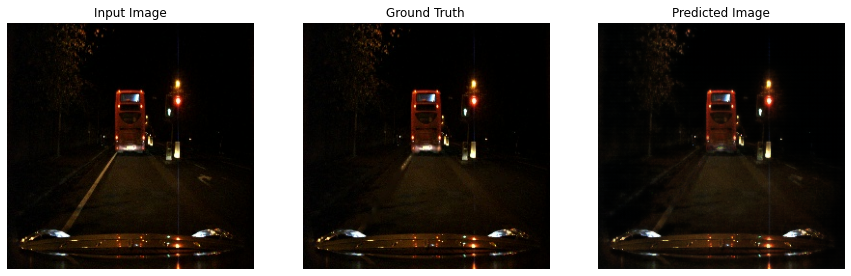

In [ ]:
# Process one image and display result
# image_paths = glob.glob(NIGHT_SRC + '*.jpg')
# img_path = image_paths[50]
# img_name = path.basename(img_path)

# input_img, target_img = load_image(img_path)
# input_img = tf.expand_dims(input_img,0)
# output_img = combined_model(input_img)

# plt.figure(figsize=(15,15))
# display_list = [input_img[0], target_img, output_img[0]]
# title = ['Input Image', 'Ground Truth', 'Predicted Image']
# for i in range(3):
#   plt.subplot(1, 3, i+1)
#   plt.title(title[i])
#   plt.imshow(display_list[i] * 0.5 + 0.5)
#   plt.axis('off')
# plt.show()

In [ ]:
# Process all images in SRC_DIR and save results in DST_DIR
# img_paths = glob.glob(SRC_DIR + '*.jpg')

# for img_path in img_paths:
#   img_name = path.basename(img_path)
#   input_img, target_img = load_image(img_path)
#   input_img = tf.expand_dims(input_img,0)
#   output_img = model(input_img)
#   save_image(output_img, DST_DIR + img_name)

In [ ]:
# check which GPU has been allocated
!pip install gputil
import GPUtil as GPU
GPUs = GPU.getGPUs()
gpu = GPUs[0]
print(tf.test.gpu_device_name())
print(gpu.name)

  Created wheel for gputil: filename=GPUtil-1.4.0-cp36-none-any.whl size=7411 sha256=8d6d36822e2a348127c711687f28257965bebaba61efc0c8f81542a1e83ee069
  Stored in directory: /root/.cache/pip/wheels/3d/77/07/80562de4bb0786e5ea186911a2c831fdd0018bda69beab71fd
Successfully built gputil
/device:GPU:0
Tesla T4
